# Limpieza Previa

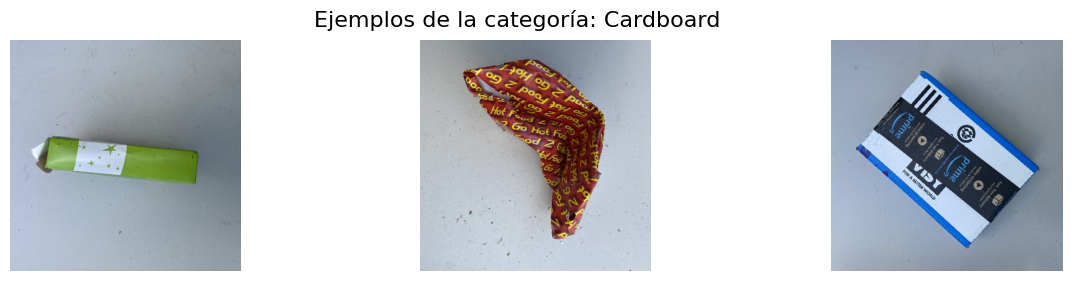

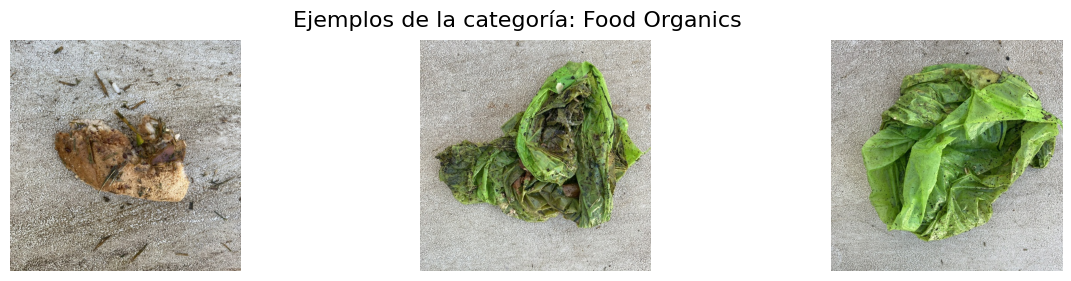

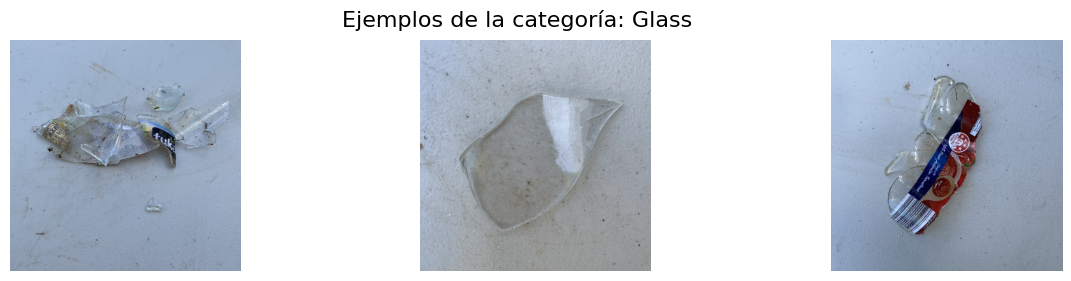

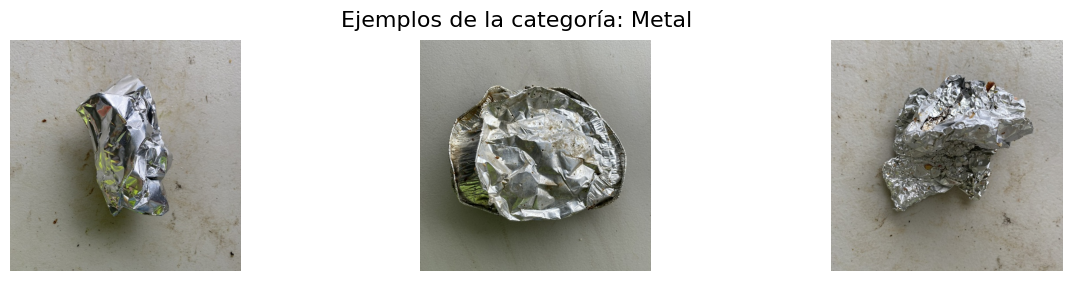

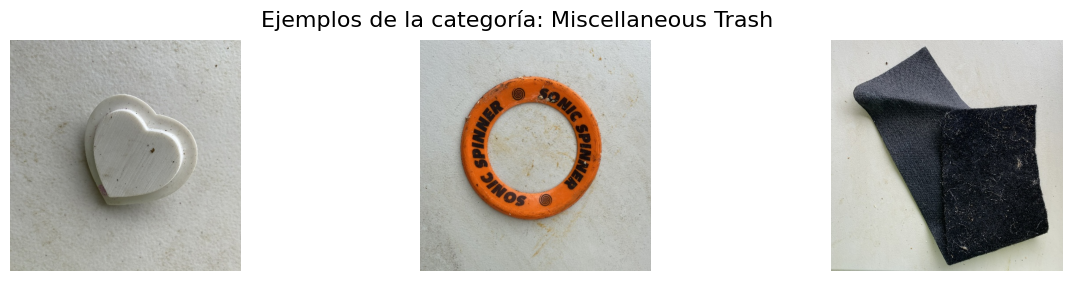

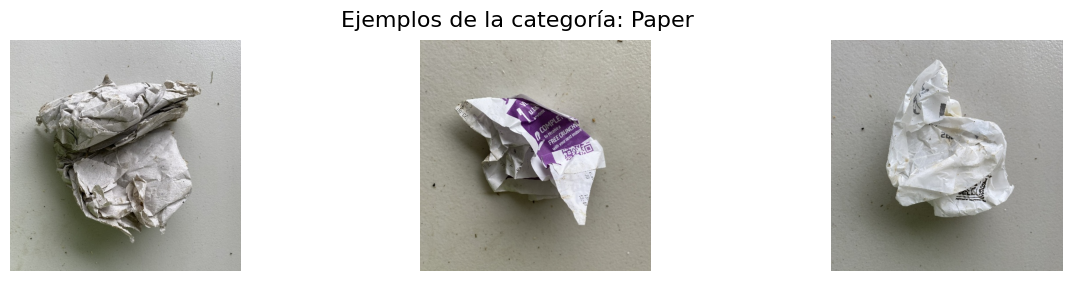

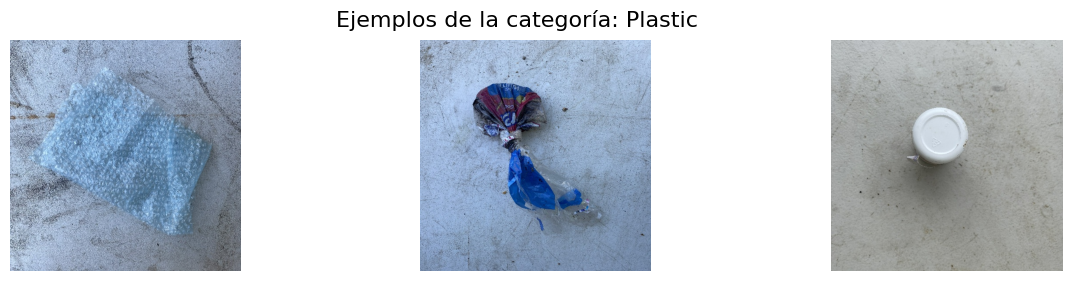

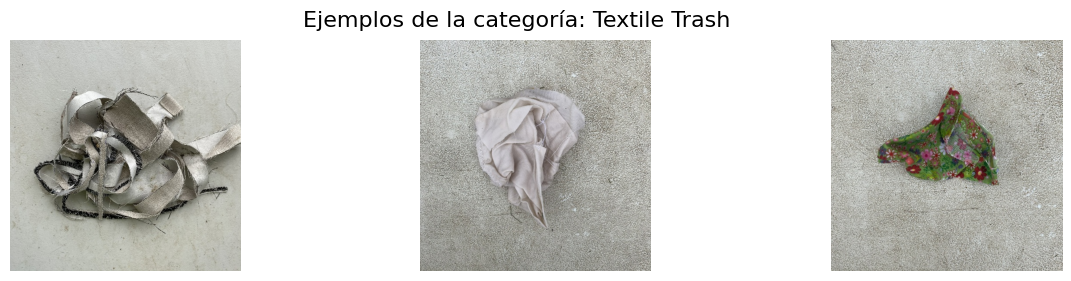

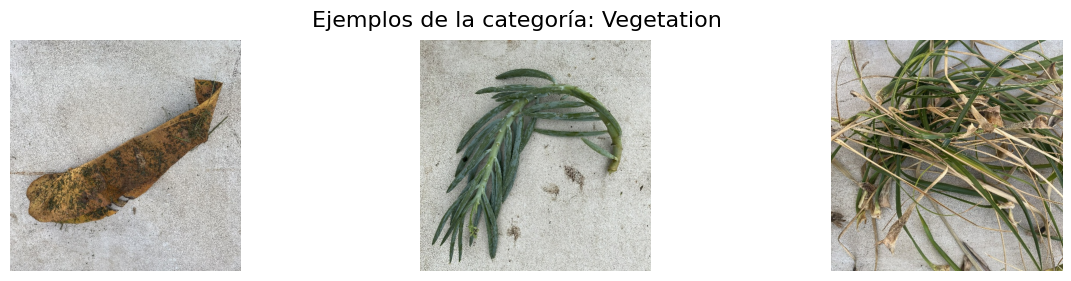

In [166]:
import os
import matplotlib.pyplot as plt
from PIL import Image

categories = ['Cardboard', 'Food Organics', 'Glass', 'Metal', 'Miscellaneous Trash', 'Paper', 'Plastic', 'Textile Trash', 'Vegetation']
dataset_path = './RealWaste'

for category in categories:
    folder_path = os.path.join(dataset_path, category)
    if os.path.exists(folder_path):
        images = os.listdir(folder_path)[:3]
        fig, axs = plt.subplots(1, 3, figsize=(15, 3))
        fig.suptitle(f'Ejemplos de la categoría: {category}', fontsize=16)
        for i, img_name in enumerate(images):
            img_path = os.path.join(folder_path, img_name)
            img = Image.open(img_path)
            axs[i].imshow(img)
            axs[i].axis('off')
        plt.show()
    else:
        print(f'La carpeta para la categoría {category} no existe en la ruta especificada: {folder_path}')


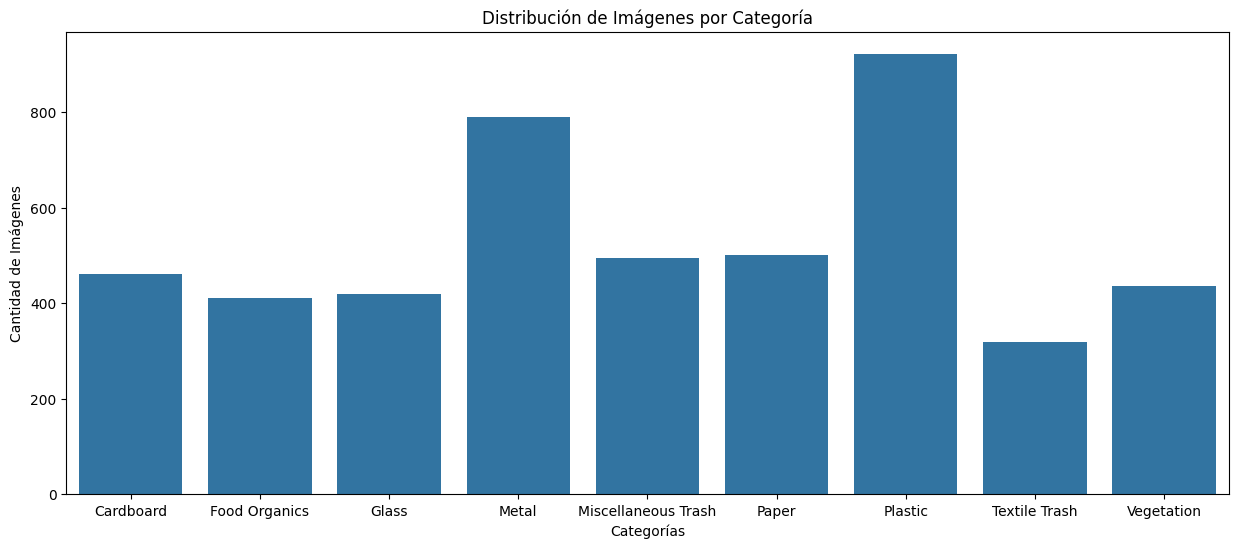

In [167]:
import seaborn as sns

category_counts = {category: len(os.listdir(os.path.join(dataset_path, category))) for category in categories}
plt.figure(figsize=(15, 6))
sns.barplot(x=list(category_counts.keys()), y=list(category_counts.values()))
plt.xlabel('Categorías')
plt.ylabel('Cantidad de Imágenes')
plt.title('Distribución de Imágenes por Categoría')
plt.show()


Se aprecia la diferencia de distribución de imagenes por clase, lo cual podría sesgar el análisis y la aplicación de modelos de ML sobre el dataset, por ende, normalizamos los datos, alcanzando una cantidad mínima común de imagenes y asegurando que cada clase entregue la misma cantidad de información y no se desbalanceen los modelos

In [168]:
import os
import random
from shutil import copyfile

categories = ['Cardboard', 'Food Organics', 'Glass', 'Metal', 'Miscellaneous Trash', 'Paper', 'Plastic', 'Textile Trash', 'Vegetation']
dataset_path = './RealWaste'
output_path = './BalancedRealWaste'
os.makedirs(output_path, exist_ok=True)

In [169]:
# Determinamos la cantidad mínima de imágenes para balancear cada clase
min_images = min([len(os.listdir(os.path.join(dataset_path, category))) for category in categories])
print(f'La cantidad mínima de imágenes en cualquier clase es: {min_images}')

import os
import random
from shutil import copyfile

# Cantidad deseada de imágenes por clase
desired_count = 300

for category in categories:
    folder_path = os.path.join(dataset_path, category)
    images = os.listdir(folder_path)
    
    # Si hay más de 300, muestreamos al azar
    if len(images) > desired_count:
        sampled_images = random.sample(images, desired_count)
    else:
        sampled_images = images

    # Crear el nuevo dataset balanceado
    category_output_path = os.path.join(output_path, category)
    os.makedirs(category_output_path, exist_ok=True)

    for img_name in sampled_images:
        source_path = os.path.join(folder_path, img_name)
        dest_path = os.path.join(category_output_path, img_name)
        copyfile(source_path, dest_path)

print(f'Dataset balanceado creado con éxito. {desired_count} muestras por clase')


La cantidad mínima de imágenes en cualquier clase es: 318
Dataset balanceado creado con éxito. 300 muestras por clase


Además, el dataset no contiene un archivo descriptor de las imagenes y sus clases/categorías, por ende, generamos uno que contendrá la referencia de cada imagen a su categoría correspondiente (incluyendo el uso de LabelEncoder para estas)

In [170]:
import os
import pandas as pd

dataset_path = './BalancedRealWaste/'
categories = os.listdir(dataset_path)

data = []

for category in categories:
    category_path = os.path.join(dataset_path, category)
    if os.path.isdir(category_path):
        for image_name in os.listdir(category_path):
            if image_name.endswith('.jpg') or image_name.endswith('.png'):
                image_path = os.path.join(category_path, image_name)
                data.append([image_name, category])

df = pd.DataFrame(data, columns=['file', 'label'])
df.to_csv('./BalancedRealWaste/realwaste_labels.csv', index=False)


In [171]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('./BalancedRealWaste/realwaste_labels.csv')

# Convertir etiquetas de texto a enteros
label_encoder = LabelEncoder()
df['label_int'] = label_encoder.fit_transform(df['label'])

print(df.head())

# Guarda el DataFrame actualizado
df.to_csv('./BalancedRealWaste/realwaste_labels.csv', index=False)


            file  label  label_int
0  Paper_259.jpg  Paper          5
1  Paper_265.jpg  Paper          5
2  Paper_271.jpg  Paper          5
3  Paper_339.jpg  Paper          5
4  Paper_477.jpg  Paper          5


Finalmente, se genera el archivo 'realwaste_labels.csv' que contendrá la referencia de cada imagen y categoría.

# Análisis Exploratorio (sobre dataset balanceado) (EDA)

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = './BalancedRealWaste/realwaste_labels.csv'
df = pd.read_csv(file_path)


In [173]:
# Mostrar las primeras filas del dataset
print(df.head())

# Información general del dataset
df.info()

# Descripción estadística del dataset
df.describe()


            file  label  label_int
0  Paper_259.jpg  Paper          5
1  Paper_265.jpg  Paper          5
2  Paper_271.jpg  Paper          5
3  Paper_339.jpg  Paper          5
4  Paper_477.jpg  Paper          5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file       2700 non-null   object
 1   label      2700 non-null   object
 2   label_int  2700 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 63.4+ KB


,label_int
count,2700.000000
mean,4.000000
std,2.582467
min,0.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,8.000000


/var/folders/cb/_0kf8mms1vdg11smc2vtpnhh0000gn/T/ipykernel_5277/171724054.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


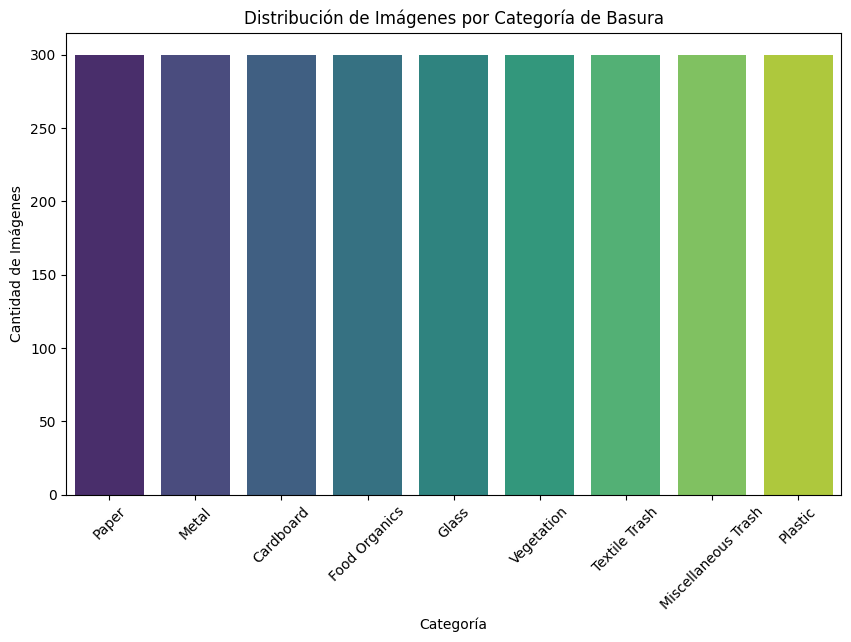

In [174]:
# Imágenes por etiqueta
label_counts = df['label'].value_counts()

# Distribución de etiquetas
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Distribución de Imágenes por Categoría de Basura')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Imágenes')
plt.xticks(rotation=45)
plt.show()


# Aplicacion de No Supervisado